### torchvision包:
    torchvision.datasets: 一些加载数据的函数及常用的数据集接口；
    torchvision.models: 包含常用的模型结构（含预训练模型），例如AlexNet、VGG、ResNet等；
    torchvision.transforms: 常用的图片变换，例如裁剪、旋转等；
    torchvision.utils: 其他的一些有用的方法
### MNIST:
    手写数字识别数据集

In [35]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import time
import sys

In [36]:
# Fashion-MNIST中一共包括了10个类别:
#     t-shirt（T恤）、trouser（裤子）、pullover（套衫）、dress（连衣裙）、coat（外套）
#     sandal（凉鞋）、shirt（衬衫）、sneaker（运动鞋）、bag（包）和ankle boot（短靴）

In [37]:
train_data = torchvision.datasets.FashionMNIST(root='./data/FashionMNIST/',train=True
                                  ,transform=transforms.ToTensor()
                                  ,download=True
                                 )
test_data = torchvision.datasets.FashionMNIST(root='./data/FashionMNIST/',train=False
                                  ,transform=transforms.ToTensor()
                                  ,download=True
                                 )

In [38]:
len(train_data),len(test_data)

(60000, 10000)

In [39]:
feature,label = train_data[0]
feature.shape,label

(torch.Size([1, 28, 28]), 9)

In [40]:
# 将数值标签转成相应的文本标签
def get_fashion_mnist_labels(labels):
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]

In [41]:
def show_fashion_mnist(images,labels):
    _,figs = plt.subplots(1,len(images),figsize=(12,12))
    for f,i,l in zip(figs,images,labels):
        f.imshow(i.view(28,28).numpy())
        f.set_title(l)
    plt.show()

In [42]:
x,y = [],[]
for i in range(10):
    feature,label = train_data[i]
    x.append(feature)
    y.append(label)

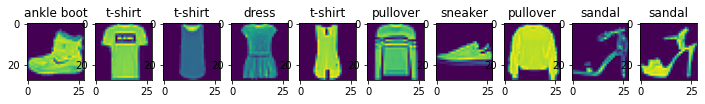

In [43]:
show_fashion_mnist(x,get_fashion_mnist_labels(y))

#### 读取小批量

In [44]:
batch_size = 256
if sys.platform.startswith('win'):
    num_works = 0
else:
    num_works = 4
train_loader = torch.utils.data.DataLoader(train_data,batch_size,shuffle=True,num_workers=num_works)
test_loader = torch.utils.data.DataLoader(test_data,batch_size,shuffle=False,num_workers=num_works)

In [46]:
# 查看读取一遍训练数据需要的时间
start_time = time.time()
for i,j in train_loader:
    continue
end_time = time.time()
print("%.2f s"%(end_time - start_time))

7.27 s
